D208: Predictive Modeling
=========================
**Scott Sullivan | 010547531**
**June 3, 2023**

## Task 1

## Part I: Research Question

### A1: Summary Questions
What factors influence high bandwidth (as described by the attribute “Bandwidth_GB_Year”) used by customers during a year? The author proposes to find the factors (if any), in the dataset that could potentially have an impact on bandwidth (and by extension, the health and profitability of the network). 

### A2: Define Goals
The first goal of this analysis is to understand customer behavior, specifically, factors that influence their bandwidth consumption. Through this, the author will better understand the customer base and usage patterns. These insights will be able to be used to develop more effective marketing strategies to increase customer satisfaction and retention.

Also, through the understanding of which factors influence 'Bandwidth_GB_Year', we can improve our product to better meet customer needs. For example, if certain attributes or behaviors correlate with higher bandwidth, the company could potentially develop new products or modify existing products or service bundles that would be aimed at this customer segment and increase revenue.


## Part II: Method Justification

### B1: Summarize four assumptions of a multiple linear regression model
There are multple assumptions the author is making in regards to the multiple linear regression model.
1. **Target Variable is Continuous**: We must ensure that the dependant variable (our y-axis) is continuous.

2. **Multiple independent variables**: While the dependent variable must be continuous, the independent varables may be continuous or categorical means, but we must have multple (2+) variables.

3. **Linear Relationship**: Our variables of interest must be exampled to have a linear relationship. This will be verified with a scatterplot.

4. **No Outliers**: To avoid skewed results caused by outliers, the author will ensure that the data is cleaned to remove outliers.


### B2: Benefits of using Python in support of various phases of the analysis
1. Python (via Jupyter Notebooks) has a broad range of libraries and frameworks that can be utilized by the author to analyze large datasets. Additionally, it is cross-platform, thereby allowing the code to be run on multiple platforms.

2. Python is also very powerful in visualization of datasets. Prior to analyzing and during the analysis, it will be beneficial to get a better view of the data, and Python allows us to graph and visualize our datasets to better extract information.

### B3: Why multiple linear regression is an appropriate technique
The author believes that making use of multiple linear regression will be appropriate for a number of reasons. Primarily, the dependent variable being used for this analysis (bandwidth) is continuous, which is a key requirement for this model. 

Additionally, multiple linear regression excels because while it will identify the independent and dependent variable relationships, it is also capable of quantifying the relationships. As a result, the author will be able to determine the predicted change in 'Bandwidth_GB_Year' as a direct result of a change in one of the independent variables while maintaining the other variables constant. This can be useful when planning quantifying potential course of actions.

## Part III: Data Preparation

### C1: Data cleaning goals & steps to clean data (includes annotated code)
The author plans to clean the data by searching for Null values (using Pandas), outliers (using histograms), removing unnecessary data attributes, converting categorical values (such as yes or no) into numerical values (1 or 0 respectively) and finally relabeling attributes to be more descriptive.

Initial examination shows 10,000 records and 50 attributes. The code to import the data and show the initial attributes are as follows.

In [172]:
import numpy as np
import pandas as pd

# Read the CSV
df = pd.read_csv('_data/churn_clean.csv')

# Copy the dataframe to RAW in case we need to come back to the raw data
df_raw = df
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


#### Duplicates
We now examine the dataframe for duplicates:

In [173]:
num_duplicates = len(df) - len(df.duplicated())
print(f"Duplicates: {num_duplicates} of {len(df)} records.\n")

Duplicates: 0 of 10000 records.



#### Nulls
And now we use missingno to check for nulls.

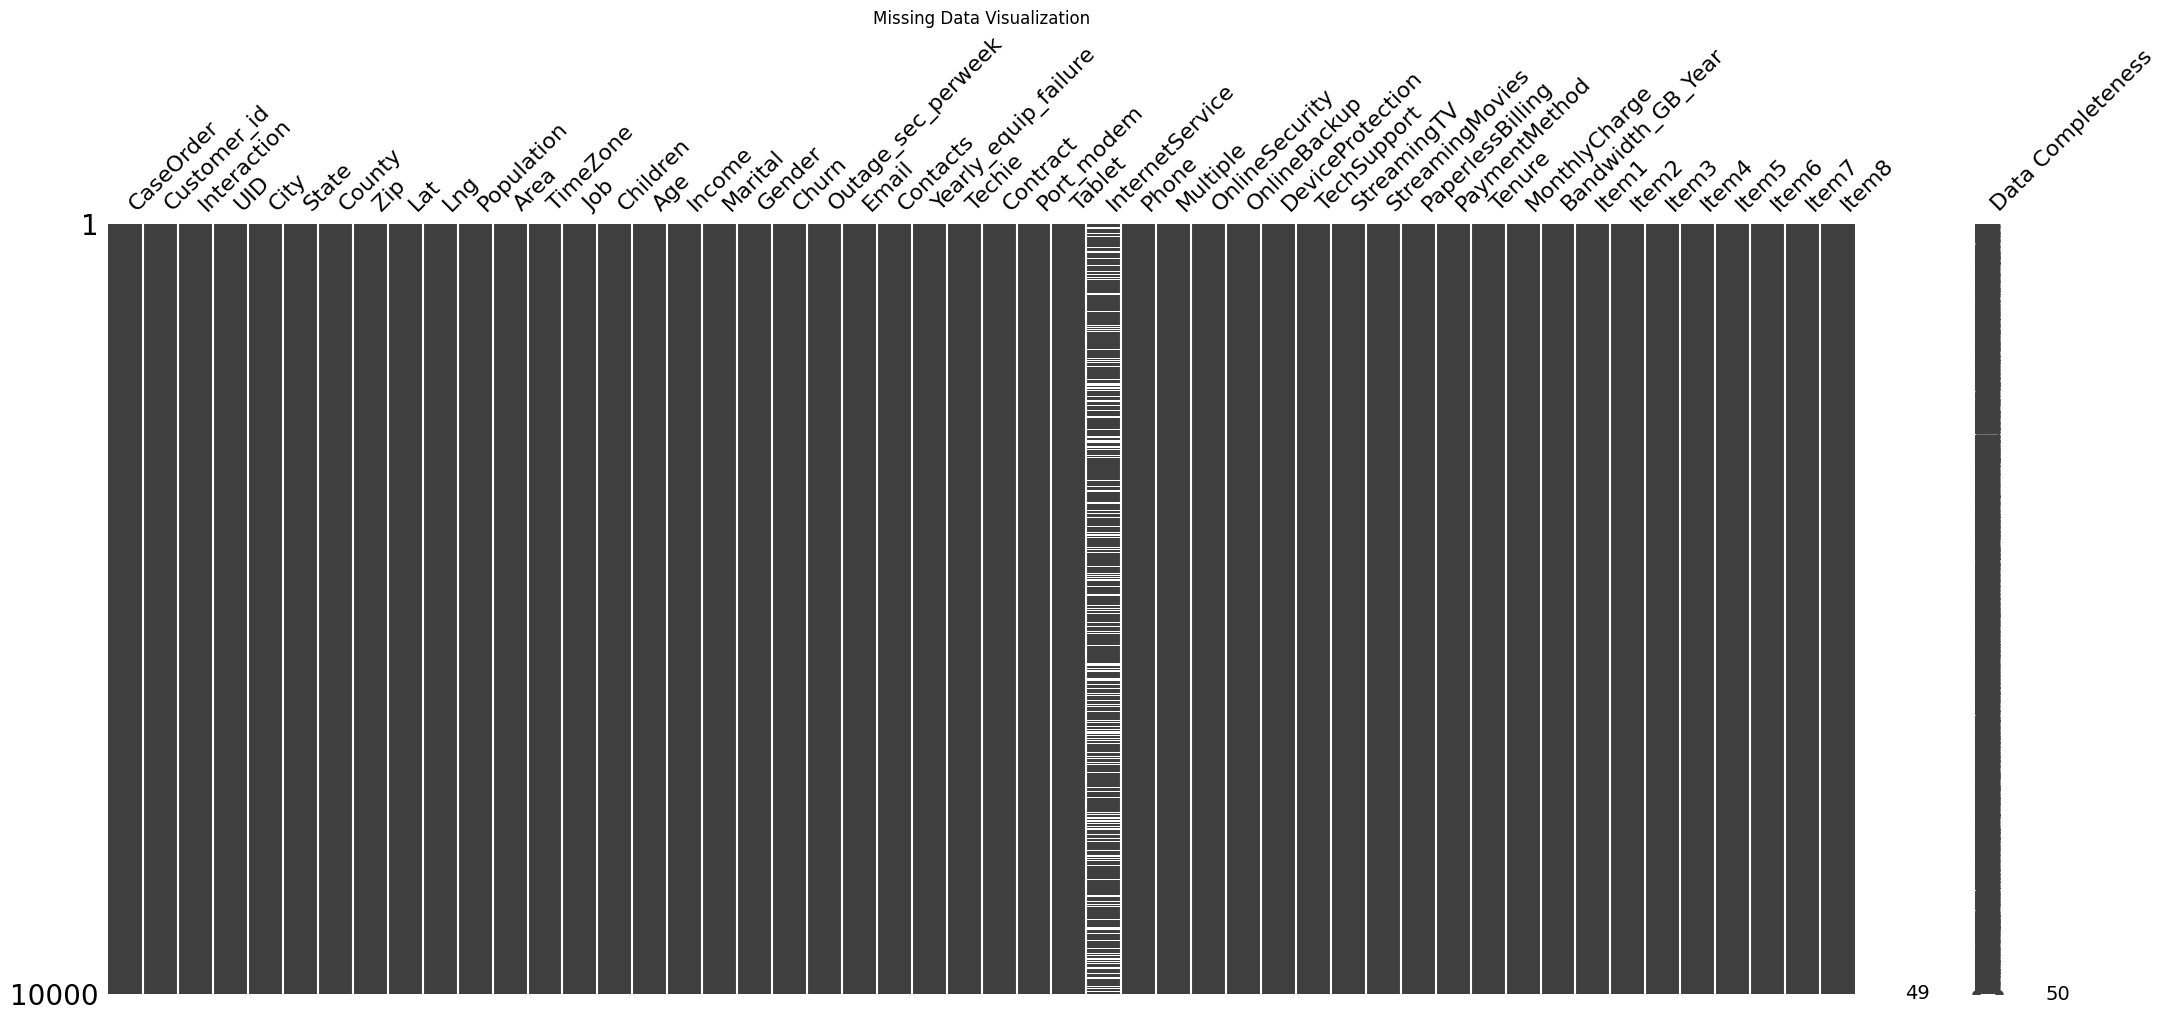

In [174]:
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
msno.matrix(df.sample(10000), labels=True)
plt.title('Missing Data Visualization')
plt.show()

We can see here that InternetService is the only attribute with Null values. To prevent significant data loss by dropping the large number of InternetService values, the author decided to perform a percentage analysis to impute the Null values with a proportional distribution matching that of the existing dataset.

In [175]:
# Calculate distribution of known values
dist = df['InternetService'].value_counts(normalize=True)

# Count Nulls to impute based on the distribution 
null_count = df['InternetService'].isnull().sum() 
impute_counts = (dist * null_count).round().astype(int)

# Impute missing values based on the distribution
missing_indices = df['InternetService'].isnull()
df.loc[missing_indices, 'InternetService'] = np.random.choice(dist.index, size=null_count, p=dist.values)

# Verify there are no more null values
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

#### Outliers
The author now looked at the outliers by printing a boxplot of the appropriate variables.

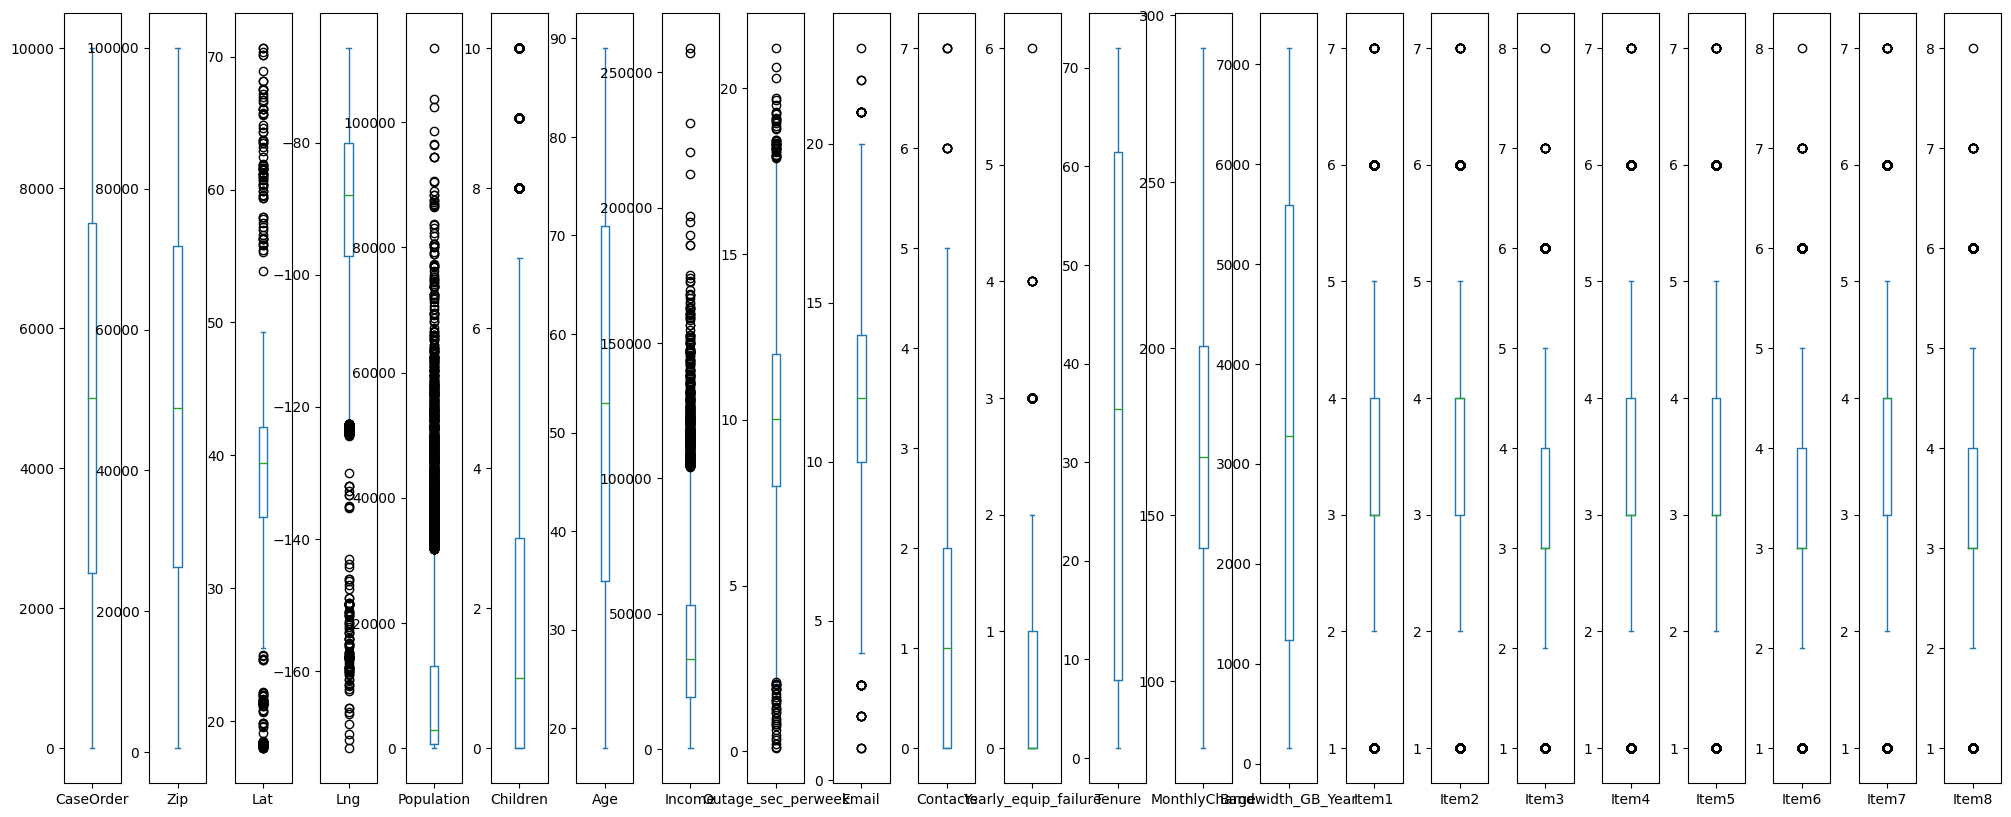

In [176]:
# Plot boxplot for each attribute. 
# NOTE: this code was previously written and used by the author for an earlier class, D206
import plotnine as p9

df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(25, 10)
)
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

Regarding the outliers, the author was found that although there were several attributes that may have outliers. That said, on a closer look, only "Children" and "Outages per week" had what were actual outliers. The former outlier included customers with 7-10 children. Outliers for the latter showed a cluster of outliers between 35 and 45 outages per week.

Therefore, the author decided to keep the outlier data since it was likely that either one or both may play a role in finding insights with our bandwidth analysis.

#### One Hot Encoding
For the attributes that were not a simple boolean Yes/No, the author performed a One Hot Encoding to each of the attributes, such as Gender, to quantify the values. These newly encoded columns were added to the dataframe and the originals dropped.

In [191]:
# One Hot Encoding
one_hot_attr = ['Gender', 'Contract', 'InternetService', 'PaymentMethod']

for attr in one_hot_attr:
    if attr in df.columns:  # if the attribute column exists error checking
        y = pd.get_dummies(df[attr], prefix=attr)
        df.drop(attr, axis=1, inplace=True)
        print(f"Dropped: {attr}\t")
        df = pd.concat([df, y], axis="columns")

print(df.head())

Dropped: PaymentMethod	
   Population  Children  Age    Income  Churn  Outage_sec_perweek  Email  \
0          38         0   68  28561.99      0            7.978323     10   
1       10446         1   27  21704.77      1           11.699080     12   
2        3735         4   50   9609.57      0           10.752800      9   
3       13863         1   48  18925.23      0           14.913540     15   
4       11352         0   83  40074.19      1            8.147417     16   

   Contacts  Yearly_equip_failure  Techie  ...  Gender_Nonbinary  \
0         0                     1       0  ...             False   
1         0                     1       1  ...             False   
2         0                     1       1  ...             False   
3         2                     0       1  ...             False   
4         2                     1       0  ...             False   

   Contract_Month-to-month  Contract_One year  Contract_Two Year  \
0                    False               T

#### YES / NO and Boolean attributes:
For each of the attributes with a Yes or No value, the author wrote the following python code to replace each string with the respective integer value with No being replaced with 0, and Yes being replaced with 1. Additionally, the attributes that are NOT pertaining to any correlation will be dropped. These include attributes such as Customer_ID, Interaction, UID, etc.

#### Item1-8 Renaming
Items1-8 have also been renamed here for more user-friendly analysis. The replacement names are pulled from the data dictionary provided by the instructor.

In [269]:
attributes_to_change = ['Churn', 'Techie', 'Port_modem', 'Tablet','Phone','Multiple','OnlineSecurity', 'DeviceProtection',
                        'OnlineBackup','TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling']
#                        'Gender_Male', 'Gender_Female', 'Gender_Nonbinary', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year',
#                       'InternetService_DSL', 'InternetService_Fiber Optic']
attributes_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Population', 'City', 'State', 'County', 
                      'Zip', 'Lat', 'Lng', 'Marital', 'Area', 'TimeZone', 'Job']
attributes_to_rename = {'Item1':'Timely_Response', 'Item2':'Timely_Fixes','Item3':'Timely_Replacements','Item4':'Reliability','Item5':'Options',
                        'Item6':'Respectful','Item7':'Courteous','Item8':'Active_Listening'}

for attr in attributes_to_change:
    print(f"Updated Strings to Numerical: {attr}\t")
    df[attr] = df[attr].replace({"Yes": 1, "No": 0, "True": 1, "False": 0})
    df[attr] = df[attr].astype(int)  # Ensure data is saved as a 1 and 0 int, not a boolean "true"/"false"


for attr in attributes_to_drop:
    if attr in df.columns:  # if the attribute column exists error checking
        df.drop(attr, axis=1, inplace=True)
        print(f"Dropped: {attr}\t")

df = df.rename(columns=attributes_to_rename)

df.head(5)

Updated Strings to Numerical: Churn	
Updated Strings to Numerical: Techie	
Updated Strings to Numerical: Port_modem	
Updated Strings to Numerical: Tablet	
Updated Strings to Numerical: Phone	
Updated Strings to Numerical: Multiple	
Updated Strings to Numerical: OnlineSecurity	
Updated Strings to Numerical: DeviceProtection	
Updated Strings to Numerical: OnlineBackup	
Updated Strings to Numerical: TechSupport	
Updated Strings to Numerical: StreamingTV	
Updated Strings to Numerical: StreamingMovies	
Updated Strings to Numerical: PaperlessBilling	


,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,...,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0,68,28561.99,0,7.978323,10,0,1,0,1,...,False,False,True,False,False,True,False,True,False,False
1,1,27,21704.77,1,11.699080,12,0,1,1,0,...,False,True,False,False,False,True,True,False,False,False
2,4,50,9609.57,0,10.752800,9,0,1,1,1,...,False,False,False,True,True,False,False,True,False,False
3,1,48,18925.23,0,14.913540,15,2,0,1,0,...,False,False,False,True,True,False,False,False,False,True
4,0,83,40074.19,1,8.147417,16,2,1,0,1,...,False,True,False,False,False,True,False,False,False,True


#### Print sample row to verify values for each column have been updated

In [270]:
column_names = df.columns
dtypes = df.dtypes
first_row = df.iloc[1].values

column_names = df.columns
dtypes = df.dtypes
first_row = df.iloc[1].values
print(f"\033[1mName\t\tType\tValue\033[0m")
for column_name, dtype, value in zip(column_names, dtypes, first_row):
    print(f"{column_name:<15}\t{dtype}\t{value:<18}\n")    

Name		Type	Value
Children       	int64	1                 

Age            	int64	27                

Income         	float64	21704.77          

Churn          	int64	1                 

Outage_sec_perweek	float64	11.69907956       

Email          	int64	12                

Contacts       	int64	0                 

Yearly_equip_failure	int64	1                 

Techie         	int64	1                 

Port_modem     	int64	0                 

Tablet         	int64	1                 

Phone          	int64	1                 

Multiple       	int64	1                 

OnlineSecurity 	int64	1                 

OnlineBackup   	int64	0                 

DeviceProtection	int64	0                 

TechSupport    	int64	0                 

StreamingTV    	int64	1                 

StreamingMovies	int64	1                 

PaperlessBilling	int64	1                 

Tenure         	float64	1.156680997       

MonthlyCharge  	float64	242.632554        

Bandwidth_GB_Year	float64	800.9827661    

### C2:  Describe dependent and independent variables using summary statistics 
The **dependent variable** for our question from section A1 is "Bandwidth_GB_Year", which is a continuous variable that captures the total bandwidth used by the customer for the year (in gigabytes). By having this as our dependent variable, the author will analyze the other attributes (or independent variables) in order to find which have a correlation affect the dependent variable. 

Our **independent variables** are the remainder of the attributes in our dataframe (after cleaning). Specifically, we have a number of categorical, boolean, and continuous variables. Included below is a summary statistic describing all of the independent variables that are necessary for answering the research question from A1.

Below is the code and output for the summary statistics:

In [273]:
# Independent variables
independent_variables = ['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
                         'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge',
                         'Timely_Response', 'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
                         'Respectful', 'Courteous', 'Active_Listening'] 
boolean_variables = ['Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
                         'Contract_Month-to-month', 'Contract_One year','Contract_Two Year',
                         'InternetService_DSL','InternetService_Fiber Optic','PaymentMethod_Bank Transfer(automatic)',
                         'PaymentMethod_Credit Card (automatic)','PaymentMethod_Electronic Check',
                         'PaymentMethod_Mailed Check']
variables = independent_variables + boolean_variables
import plotnine as p9

for var in variables:
    print(f"Summary statistics for {var}:")
    print(df[var].describe())
    print("\n")

Summary statistics for Children:
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64


Summary statistics for Age:
count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


Summary statistics for Income:
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


Summary statistics for Churn:
count    10000.000000
mean         0.265000
std          0.441355
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn, dtype: float64


Summary statistics for Outage_sec_perweek:
count    10000.00

### C3. Univariate and bivariate visualizations (dependent and independent variables)


including the dependent variable in your bivariate visualizations.


In [263]:
# Independent variables
independent_variables = ['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
                         'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge',
                         'Timely_Response', 'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
                         'Respectful', 'Courteous', 'Active_Listening'] 
boolean_variables = ['Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
                         'Contract_Month-to-month', 'Contract_One year','Contract_Two Year',
                         'InternetService_DSL','InternetService_Fiber Optic','PaymentMethod_Bank Transfer(automatic)',
                         'PaymentMethod_Credit Card (automatic)','PaymentMethod_Electronic Check',
                         'PaymentMethod_Mailed Check']

Univariate Visualizations



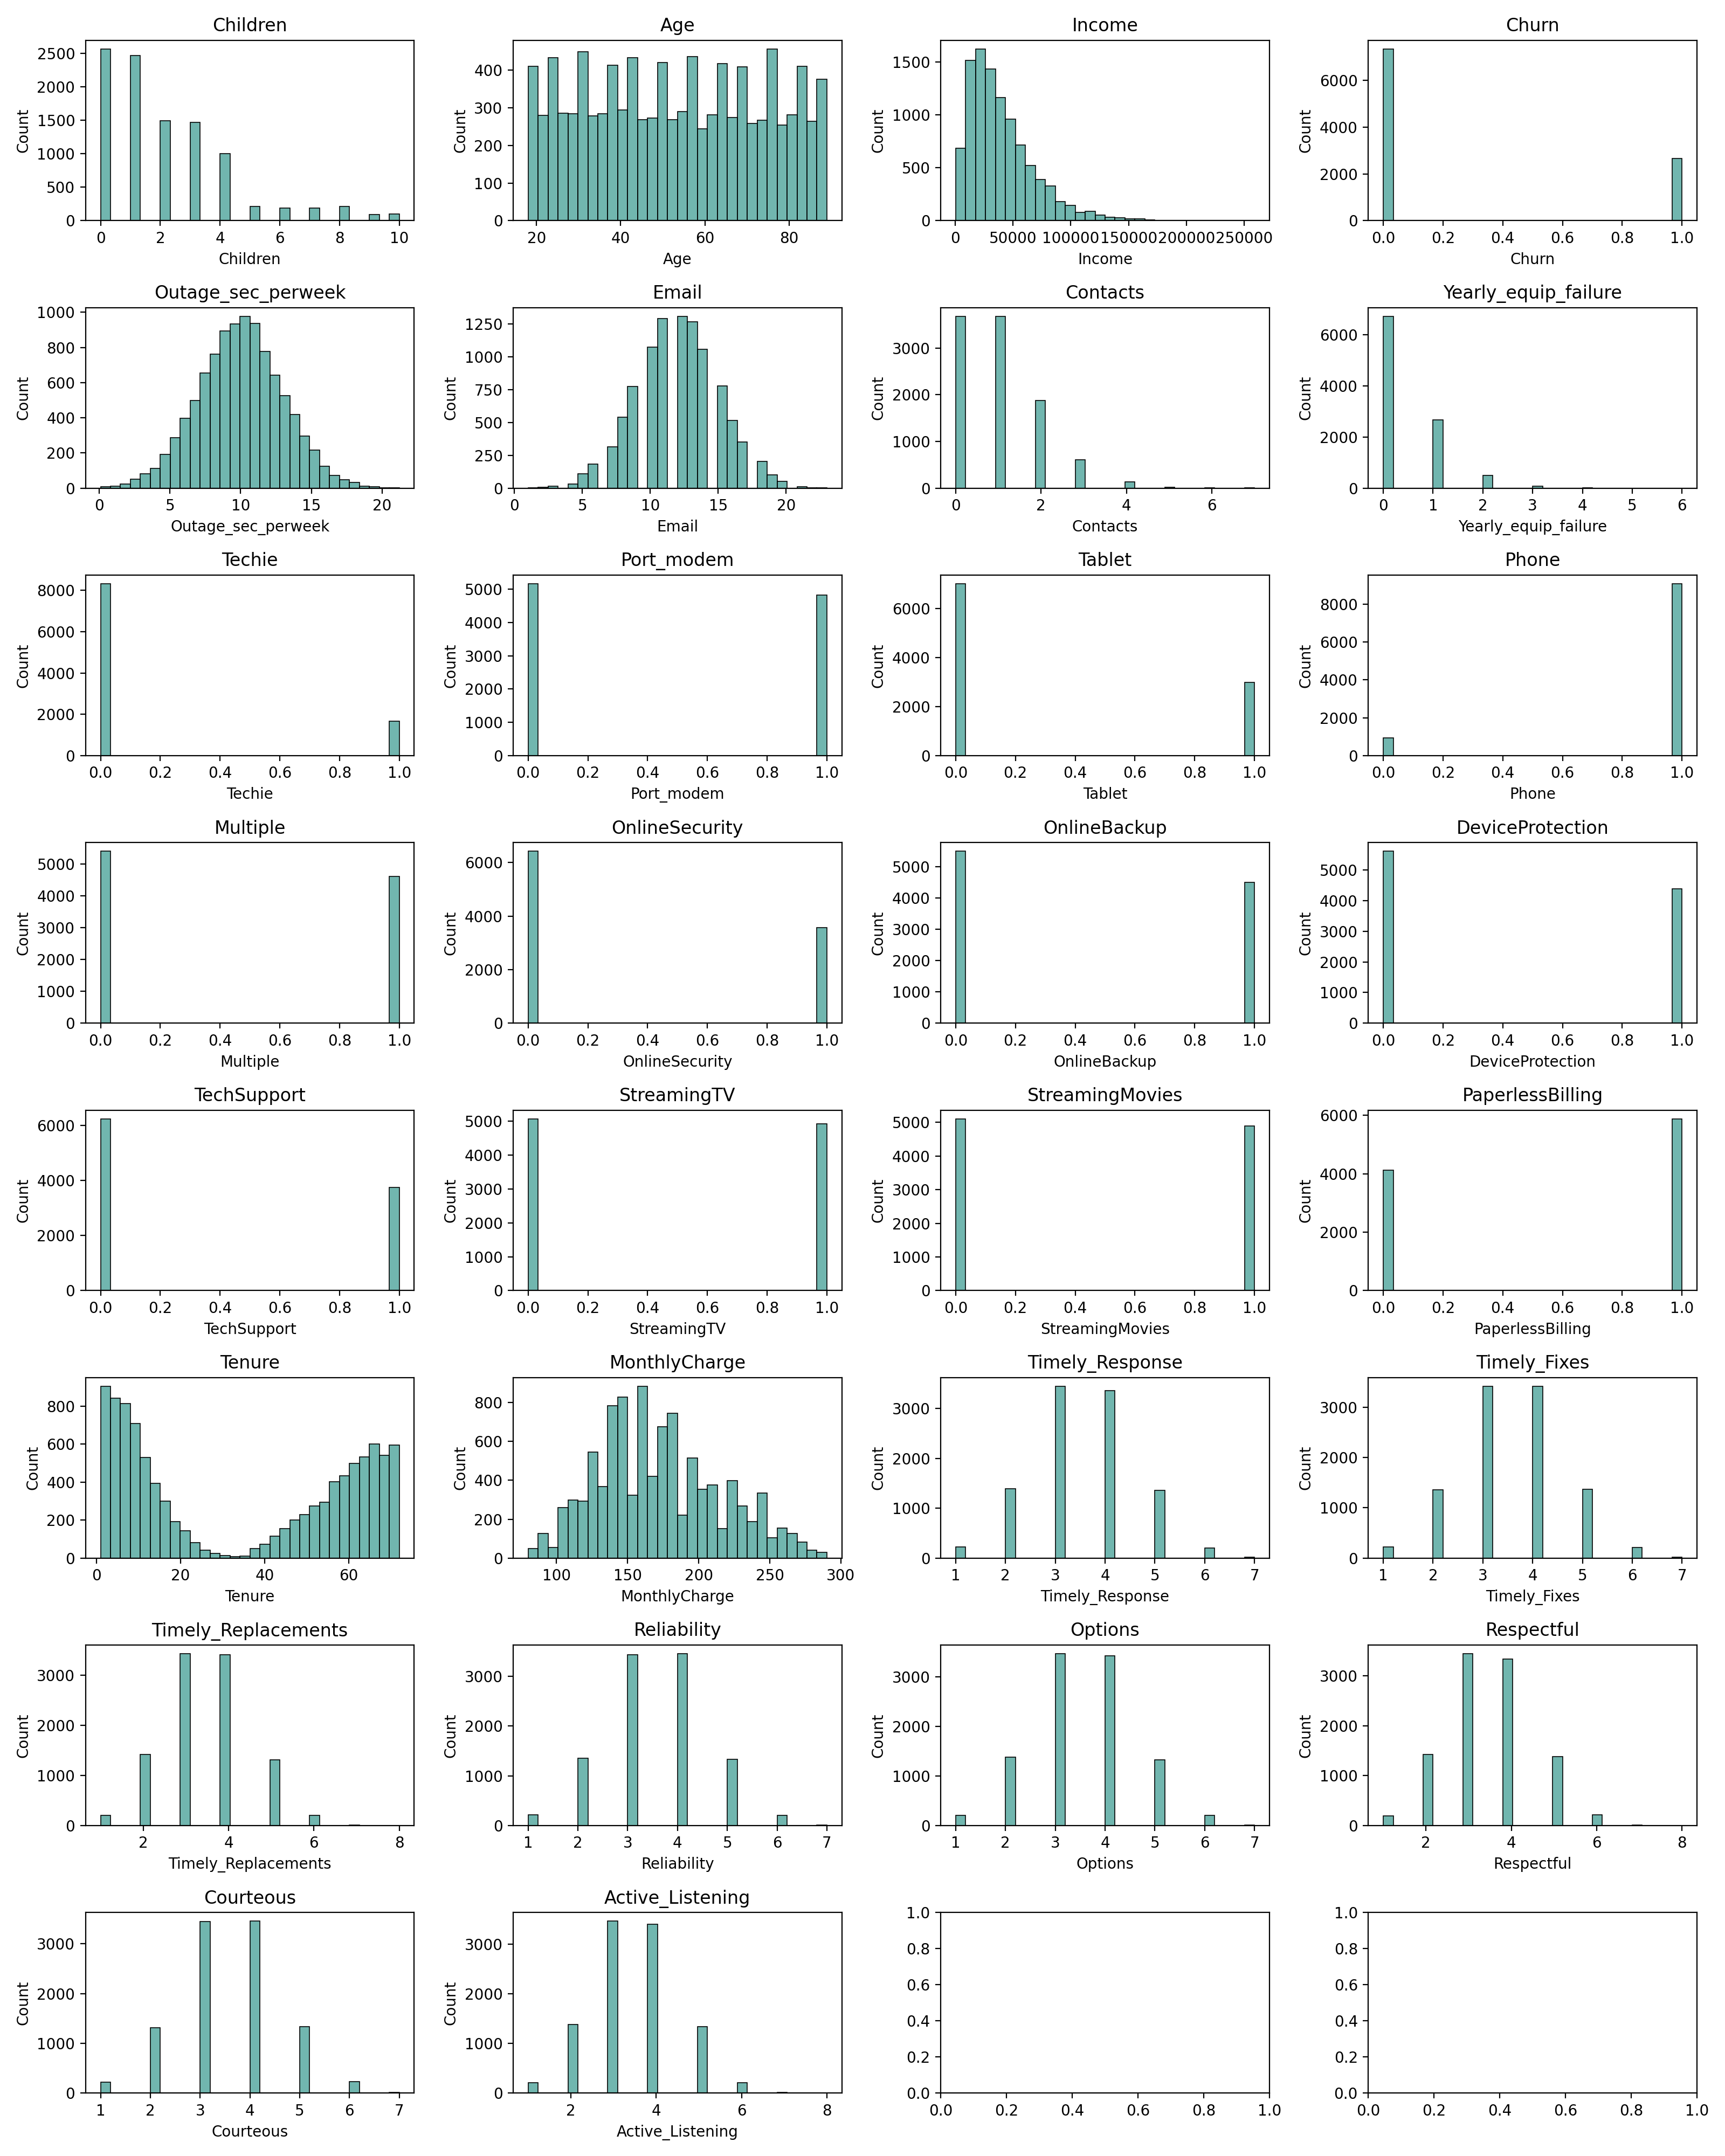

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9

# UNIVARIATE Histograms
print("Univariate Visualizations\n")

variables = independent_variables
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(16,20))
for ax, var in zip(axs.flatten(), variables):
    sns.histplot(data=df, x=var, bins=30, color='#429e94', ax=ax)
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


Bivariate Visualizations



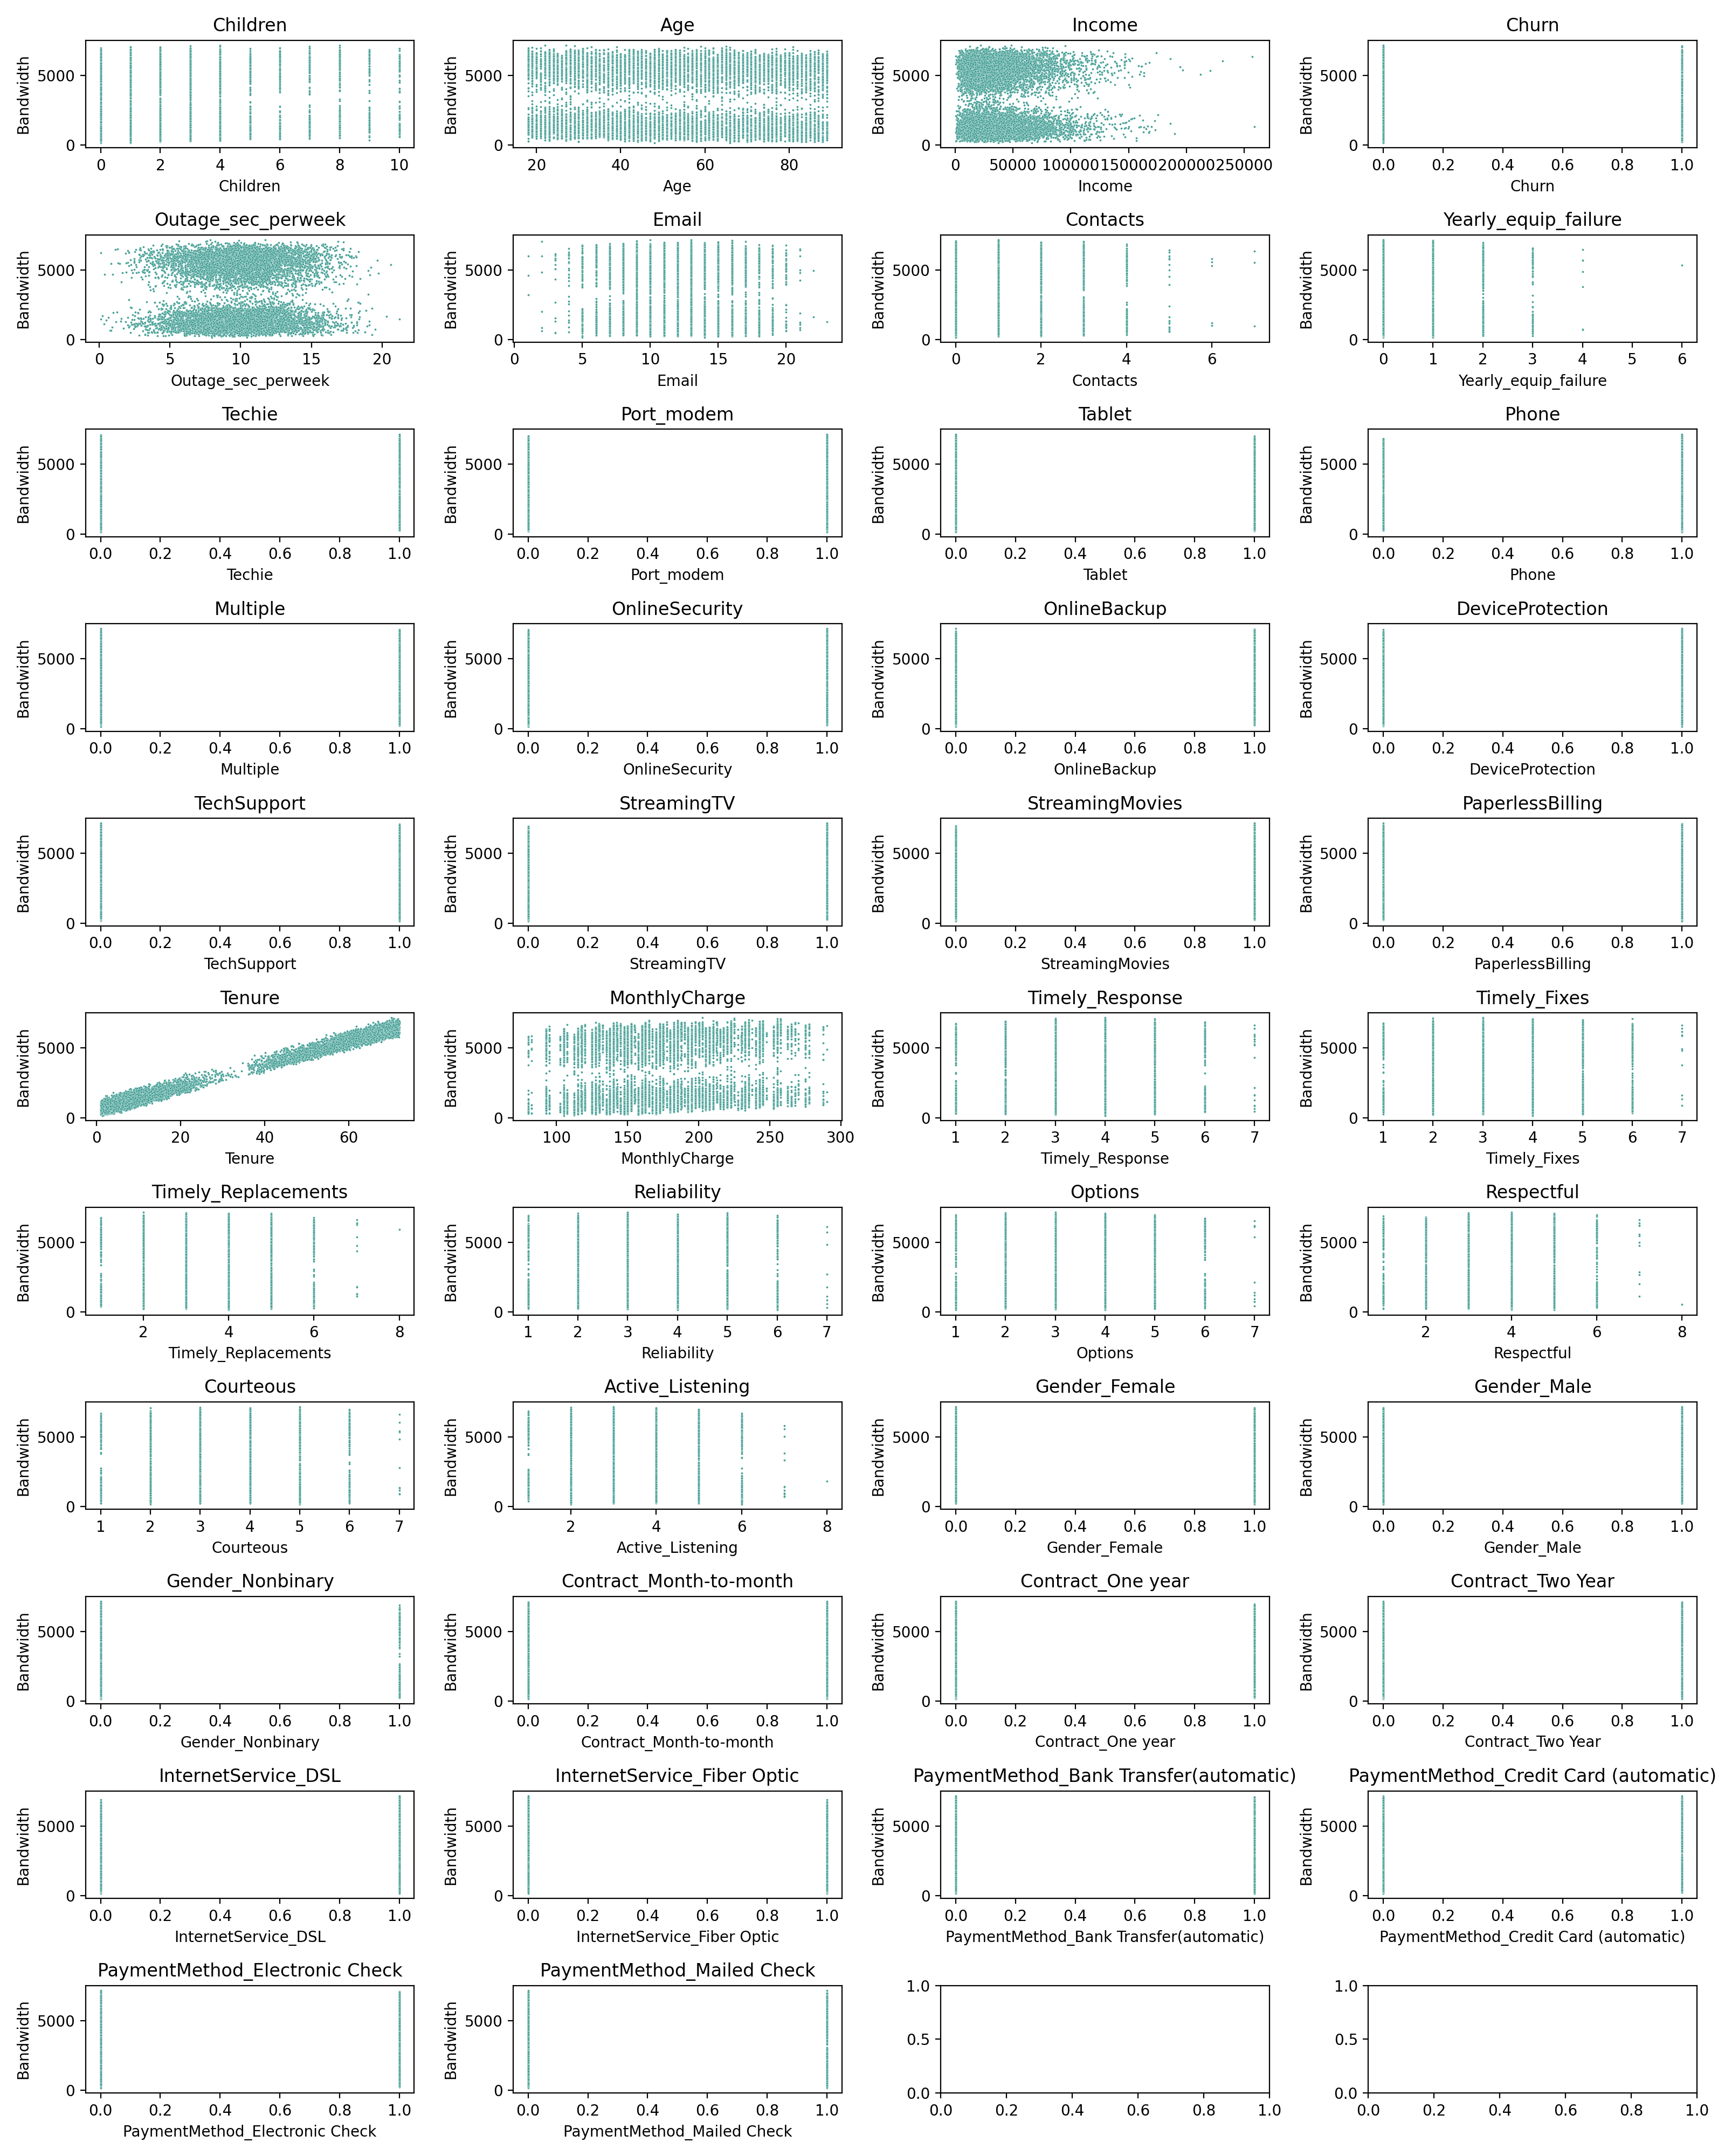

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9

# UNIVARIATE Histograms
print("Bivariate Visualizations\n")
variables = independent_variables + boolean_variables
fig, axs = plt.subplots(nrows=11, ncols=4, figsize=(16,20))
for ax, var in zip(axs.flatten(), variables):
    sns.scatterplot(data=df, x=var, y='Bandwidth_GB_Year', s=2, color='#429e94', ax=ax)
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('Bandwidth')
plt.tight_layout()
plt.show()


### C4. Data Transfomration Goals and Transformation Steps Taken
The author focused his attention around the bandwidth attribute (Bandwidth_GB_Year) as the dependent variable (it is the continuous target variable) to explore and analyze which factors (from the independent variables) showed a correlation with the bandwidth. 

**Data was transformed using the following steps.** First, it needed to be cleaned in preperation for the training and testing the dataset model. To clean the data, null values were removed, "yes/no" and "true"/"false" values were converted to 1/0, respectively. This was done by replacing null values with appropriate default vales for the former case. For the latter cases, the boolean strings were converted to numerical booleans using a replace on each column with said data values.

Additionally, categorical data was encoded via one-hot encoding to multiple new attributes that were boolean values. This was accomplished using the pandas pd.get_dummies(df[attribute], prefix=attribute) code from Section C1 above.

**This goal of data transformation** left us with a complete set of data that was prepared for proper analysis on the dependent variable. The author ensured that all required data for the analysis was in numerical form (for later regression analysis). Specifically, this included converting categorical data into numerical form (ie. one-hot encoding mentioned above). The author searched for missing values and depending on the nature of each data attribute, resolved these issues. Finally, the author checked for outliers (though the author determined that the nature of the outliters did not require they be removed due to the data insights they might hold).

All annotated code is illustrated in section C1, labeled according to each transformation. Due to this being a jupter notebook, the actual code will be kept in section C1.

### C5. Export Prepared Data Set as CSV File 
Below is the code written by the author to export the prepared dataframe as a CSV file.

In [272]:
# Export Prepared Data to CSV
file_name = '_data/cleaned_and_prepared_dataframe.csv'
df.to_csv(file_name, index=False)
print(f"Exported to {file_name}")

Exported to _data/cleaned_and_prepared_dataframe.csv


## Part IV: Model Comparison and Analysis

### D1: Construct Initial Multiple Linear Regression Model from All Independent Variables from C2
For clarification, the independent variables from C2 are being copied here. This is the exact same list given in C2:

In [274]:
# Independent variables
independent_variables = ['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
                         'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge',
                         'Timely_Response', 'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
                         'Respectful', 'Courteous', 'Active_Listening'] 
boolean_variables = ['Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
                         'Contract_Month-to-month', 'Contract_One year','Contract_Two Year',
                         'InternetService_DSL','InternetService_Fiber Optic','PaymentMethod_Bank Transfer(automatic)',
                         'PaymentMethod_Credit Card (automatic)','PaymentMethod_Electronic Check',
                         'PaymentMethod_Mailed Check']
variables = independent_variables + boolean_variables

At this point, the author will create an initial multiple lindear regression model that uses all the above independent variables. The author chose to use Scikit Learn due to its popularity and the fact that the author has used this framework previously. The LinearRegression model is imported, and the attributes listed immediately above are loaded as the X (independent) axis and our bandwith (Bandwith_GB_Year) is loaded as our dependent variable.

The Ordinary Least Squares was performed as the multiple linear regression. This model was chosen due to its ability to estimate the relationship between multiple independent variables (by minimizing the sum of squares). Since scikit-learn does not directly provide the required statistics for this, the author used Statsmodels for the statistics.

In [392]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# independent variables from above and the target variable (bandwidth used by the customer)
X = df[independent_variables]
y = df['Bandwidth_GB_Year']

# Create a Linear Regression model
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.359e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):                        0.00
Time:                        23:03:33   Log-Likelihood:                         -67136.
No. Observations:               10000   AIC:                                  1.343e+05
Df Residuals:                    9970   BIC:                                  1.345e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

The author repeated this with the encoded categorical variables.

In [393]:
X = df[boolean_variables]
y = df['Bandwidth_GB_Year']

# Create a Linear Regression model
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     9.754
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.38e-13
Time:                        23:03:36   Log-Likelihood:                -91045.
No. Observations:               10000   AIC:                         1.821e+05
Df Residuals:                    9991   BIC:                         1.822e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### D2: Statistically Based Model Reduction Justification
Based on the metrics analyzed above, the author decided to reduce the model to some key parameters in addition to a few 'placebo' parameters to ensure that the correlation was present. 

Tenure had a high coefficient (82), as did OnlineSecurity (69), DeviceProtection(44), StreamingTV(90), and Gender_Male(52). InternetService seems to be extrememly high (possibly an outlier due to the one hot encoding conversion that was done on that attribute earlier.

Additionally, attributes with a p-value that was not statistically significant (values larger than 5% or 0.05) were removed. This has the benefit of reducing the likelihood of overfitting the data.


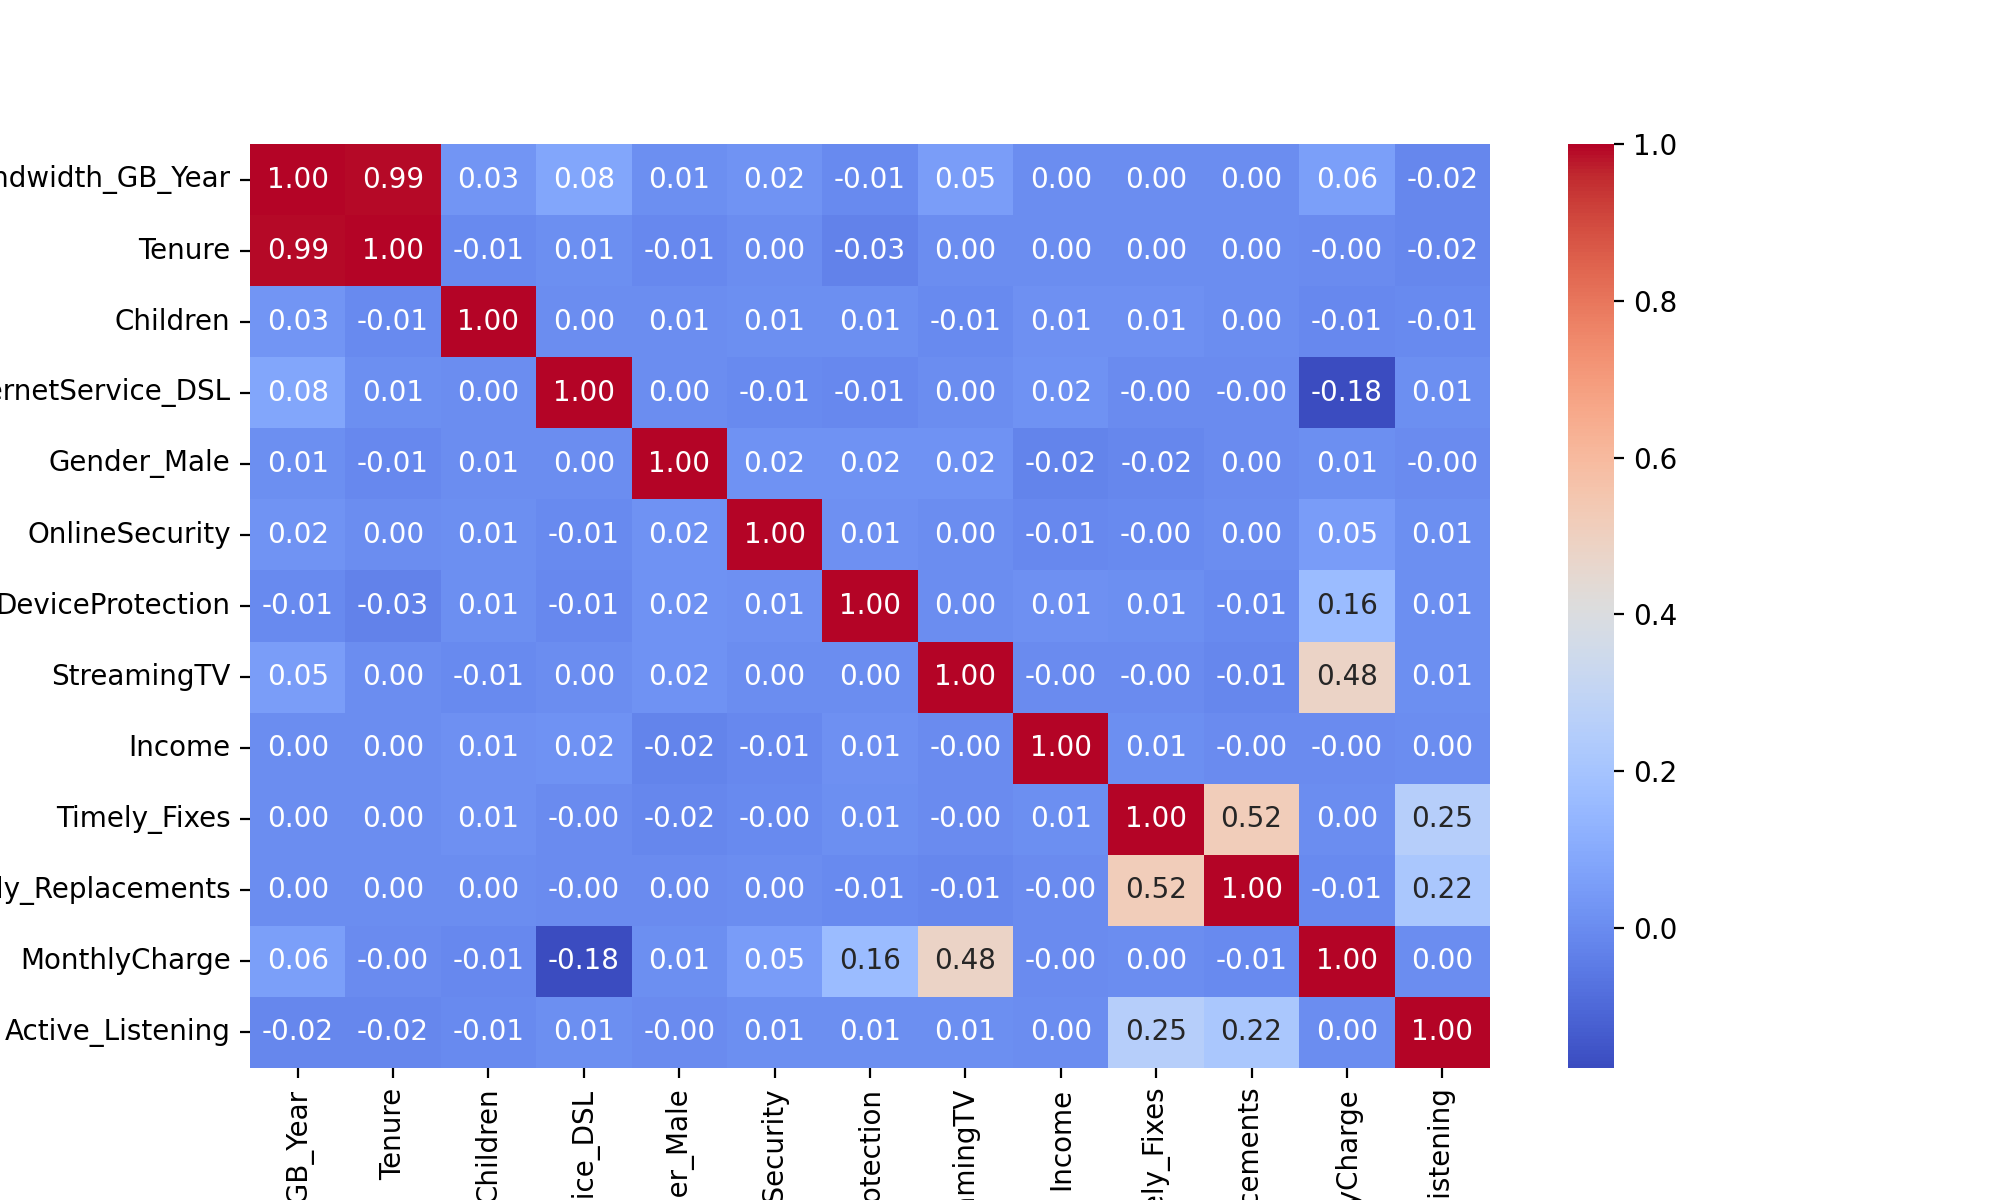

In [394]:
reduced_df = df[['Bandwidth_GB_Year', 'Tenure', 'Children', 'InternetService_DSL', 'Gender_Male',
                  'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'Income',
                  'Timely_Fixes', 'Timely_Replacements', 'MonthlyCharge','Active_Listening']]
plt.figure(figsize=(10,6))
sns.heatmap(reduced_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Upon looking at the heatmap, the author determined there was a very high correlation between Tenure and Bandwidth. 


### D3: Reduced Linear Regression Model
Based on the analysis in D2, the author has reduced the model to include only the positive correlated attributes. The primmary attribute, Tenure and StreamingTV, are the largest one, showing a 0.99 in our correlation chart and a coefficient of 82 in our previously fitted model (for Tenure). For good measure, the author decided to include most of the positively correlated attributes to verify the R-squared result.

#### Significance of the Coefficients
The **coefficients** are examined as they signify the extent of impact on the dependent variable from that of the of each of the independent variables.

Below is the creation of the redcued linear model with these attributes.

In [395]:
# Reduced linear regression model
reduced_independent = df[['Tenure','MonthlyCharge','Children', 'StreamingTV']]
reduced_dataframe = sm.OLS(df['Bandwidth_GB_Year'], reduced_independent).fit()
print(reduced_dataframe.summary())

                                 OLS Regression Results                                
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          7.507e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):                        0.00
Time:                        23:03:46   Log-Likelihood:                         -68675.
No. Observations:               10000   AIC:                                  1.374e+05
Df Residuals:                    9996   BIC:                                  1.374e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

As we can see in the above OLS Regression Results, the R-squared is still 0.997 (compared to 0.998 in our full dataset). So while we have eliminated almost all of the previous attributes, we have retained the correlation almost exactly, showing the strong correlation between Tenure and bandwidth used (StreamingTV was also a large coefficient, but also had a much higher standard error).

### E1: Data Analysis
The author's initial multiple linear regression model, given above, included a large number of predictors from the initial dataset. The author begain with this model with the goal of understanding the inter-relationship between the various attributes which had a potential to drive the dependent attribute, Bandwidth_GB_Year. By using this large a number of attributes, though, increases the likelihood of overfitting the data and not being able to be a proper predictor with future data, thus making it a poor model.

To remedy this, the author reduced negatively correlated attributes and only included positively correlated ones. This reduced dataset would reduce the complexity of our model and, thus, reduce the chance of overfitting. The author accomplished this by comparing coefficients from the regression model, p-values, and correlation values. Promising candidates for attribute removal were low coefficients, high p-values, and low/negative correlation values.

This reduced model became simpler and more likely to fit unknown data. As a final check, the R-squared value of the original- and reduced-model were compared and found to be statistically similar while reducing the model size. In both linear regression models, the R-squared models were 0.997 or higher (illustrating a higher probability of more variability in the data).

### E2: Output of all calculations
Below is the data summary from both the full dataset model and the reduced dataset model.

In [396]:
print("Multiple Linear Regression Summary - Full Set")
print(results.summary())
print("\n\nReduced Linear Regression Summary - Reduced Set")
print(reduced_dataframe.summary())

Multiple Linear Regression Summary - Full Set
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     9.754
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.38e-13
Time:                        23:03:50   Log-Likelihood:                -91045.
No. Observations:               10000   AIC:                         1.821e+05
Df Residuals:                    9991   BIC:                         1.822e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

Below is a residual plot of the reduced linear regression model followed by the residual standard error:

In [397]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

reduced_independent = ['Tenure','MonthlyCharge','Children', 'StreamingTV']

# Training and test set creation
X_train, X_test, y_train, y_test = train_test_split(df[reduced_independent], df['Bandwidth_GB_Year'], test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.755e+05
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:03:54   Log-Likelihood:                -54928.
No. Observations:                8000   AIC:                         1.099e+05
Df Residuals:                    7995   BIC:                         1.099e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.7239     11.922     -0.732

Residual Standard Error: 5.235684194666419


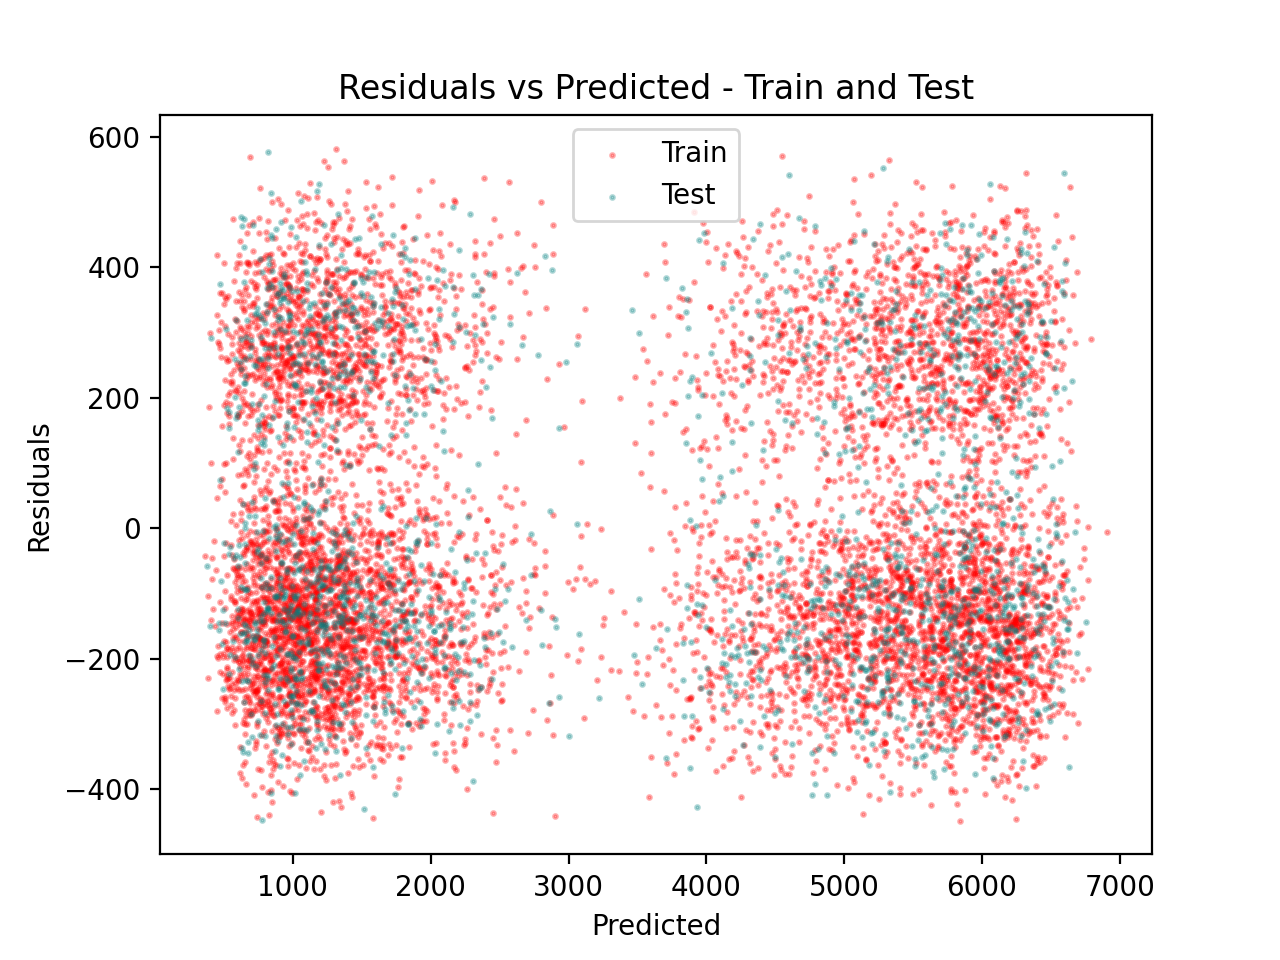

In [407]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#y_pred = results.predict(X_test)
#residuals = y_test - y_pred

y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.scatter(y_train_pred, residuals_train, color="red", s=2, alpha=0.3, label='Train')
plt.scatter(y_test_pred, residuals_test, color="teal", s=2, alpha=0.3, label='Test')
plt.legend()
plt.title("Residuals vs Predicted - Train and Test")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

mean_squared_error = mean_squared_error(y_test, y_test_pred)
p = X_test.shape[1]
residual_standard_error = np.sqrt(mean_squared_error / (X_test.shape[0] - p - 1))
print(f"Residual Standard Error: {residual_standard_error}")

### E3: Working code for linear regression models using a Python
The author has included the error-free, working code in the entire section E1 and E2 as seen above.


## Part V: Data Summmary and Implications

### F1: Summary of Findings of Data Analysis
### F2: Recommended Course of Action Based on Analysis

## Part VI: Demonstration
### G: Panopto Video

### H: Web Sources
### I: In-text citations and references